In [1]:
from Bio import SeqIO
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import logomaker

Matplotlib is building the font cache; this may take a moment.


In [2]:
def calculate_rmsd_mda(gmx_path, pdb_ref_path, high_ids):

    trajectory=md.load(gmx_path + 'traj.xtc', top=gmx_path + 'traj.gro')

    pdb_ref = md.load(pdb_ref_path)
  
    backbone_ref=[] 
    with open(pdb_ref_path, 'r') as file:
        for index, line in enumerate(file):
            columns = line.strip().split()
            if len(columns) >= 4 and columns[2] == "N":
                backbone_ref.append(index+1)
    
 #   helix = np.concatenate([np.arange(173,219,1), np.arange(266,301,1)]) # P08588
 #   helix = np.concatenate([np.arange(184,220,1), np.arange(270,300,1)]) # P13945
    
 #   loop = np.concatenate([np.arange(142,170,1), np.arange(300,308,1), np.arange(70,83,1)]) # P08588
  #  loop = np.concatenate([np.arange(153,184,1), np.arange(300,310,1), np.arange(80,90)]) # P13945
    loop = np.concatenate([np.arange(160,180,1), np.arange(280,290,1), np.arange(85,95,1)]) # P07550
    
    filters = high_ids # helix # loops 
 #   rmsd = md.rmsd(trajectory, pdb_ref, atom_indices=np.array(backbone_ref)[filters], ref_atom_indices=np.array(backbone_ref)[filters])
   
    rmsd = md.rmsd(trajectory, pdb_ref, atom_indices=np.array(backbone_ref), ref_atom_indices=np.array(backbone_ref))

    return rmsd

In [3]:
def calculate_plddt(path_clusters, path_full):
    
    plddt_file = path_clusters + [file for file in os.listdir(path_clusters) if '_scores_rank_001' in file][0] 
    with open(plddt_file, 'r') as file:
        result_data = json.load(file)
    
    ref_plddt_file = path_full + [file for file in os.listdir(path_full) if '_scores_rank_001' in file][0] 
    with open(ref_plddt_file, 'r') as file:
        ref_data = json.load(file)

    plddt_local = result_data['plddt']
    high_ids = np.where(np.array(ref_data['plddt']) > 60)
    plddt_avg = np.mean(plddt_local)
    
    return plddt_avg, high_ids

In [4]:
def count_sequences_in_fasta(path_msa):
    sequence_count = sum(1 for _ in SeqIO.parse(path_msa, "fasta"))
    return sequence_count

In [13]:
def plot(clu_ids, rmsd, plddt, size, name):
    os.makedirs('results_figures', exist_ok=True)
    
    fig, ax = plt.subplots(figsize=(7,3))

    sc = plt.scatter(clu_ids, rmsd, cmap='rainbow_r', s=size, c=plddt) 
    cbar = plt.colorbar(sc, ax=ax, pad=0.02, label='plDDT')
    plt.title(name + ' (excluded low plDDT residues)') #+ ' extra_cellular oriented')
    plt.xlabel('cluster_id')
    plt.ylabel('RMSD from full MSA AlphaFold2 prediction')
    plt.xticks(rotation=90)
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.4)
    plt.xlim(left=-1,right=len(rmsd)+0.2)

    plt.tight_layout()
    plt.show()
  #  fig.savefig('results_figures/' + name+'_loop.png',dpi=500, format='png')

In [20]:
def main(name):
    
    path_full =  name + '/AF_full/'
    path_clusters =  name + '/AF_clusters/'
    gmx_path =  name + '/gmx_traj/'
    ref_pdb = gmx_path + 'fullMSA_noH.pdb' 
    
    plddt = []
    size = []
    clu_ids = os.listdir(path_clusters)
    sorted_clu_ids = sorted(clu_ids, key=lambda x: int(x.split('_')[-1]) if '_' in x and x.split('_')[-1].isdigit() else float('inf'))

    for clu_id in sorted_clu_ids:
        
        path_cluster = path_clusters + clu_id +'/' 
        path_msa = name + '/clusters/' + clu_id + '.fasta'  
        
        cluster_pdb = path_clusters + clu_id + '/' + [file for file in os.listdir(path_cluster) if '_relaxed_rank_001' in file][0]
    
        plddt_val, high_ids = calculate_plddt(path_cluster, path_full)
        plddt.append(plddt_val)
        size.append(count_sequences_in_fasta(path_msa))
    
    rmsd = calculate_rmsd_mda(gmx_path, ref_pdb, high_ids)

    np.save(gmx_path+'rmsd.npy', rmsd)
    np.save(gmx_path+'plddt.npy', plddt)
    np.save(gmx_path+'size.npy', size)
    
    plot(sorted_clu_ids, rmsd, plddt, size, name)


pdb_2HDM


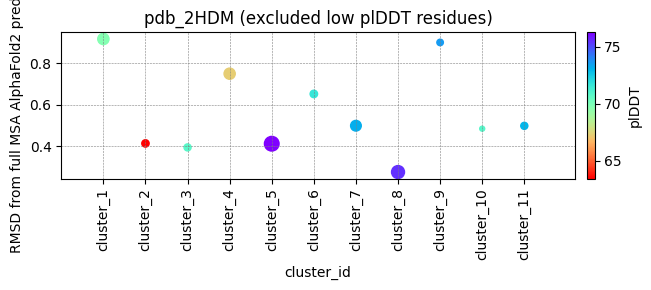

pdb_2QQJ


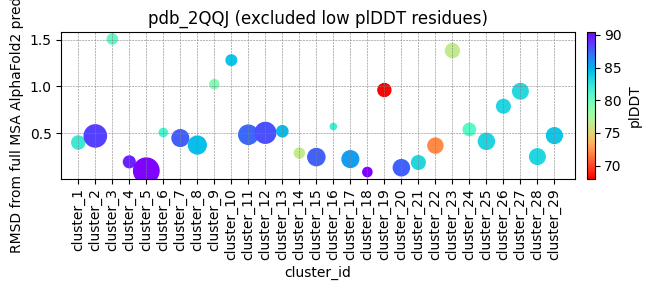

pdb_1MNM


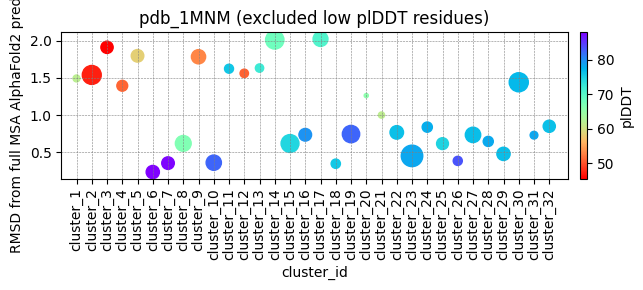

pdb_2C1U


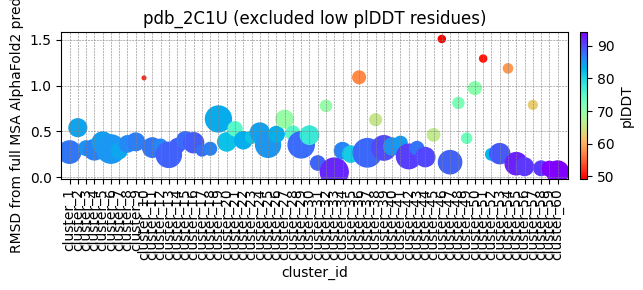

pdb_2LEP


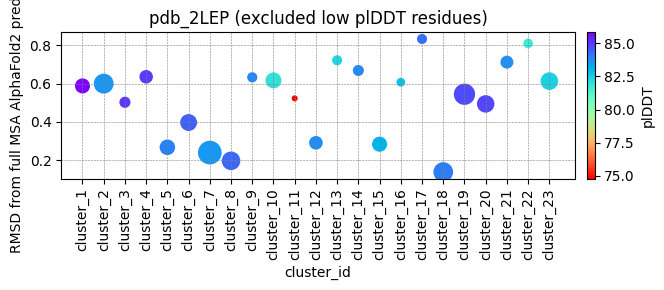

pdb_2GED


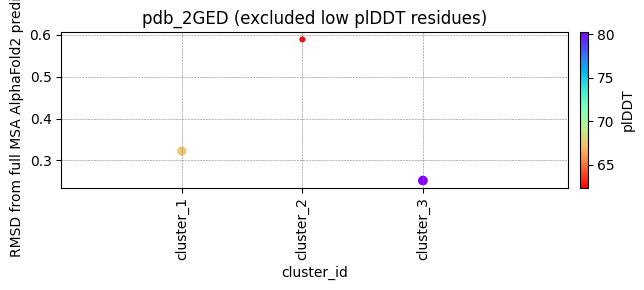

pdb_3ZWG
pdb_1X0G


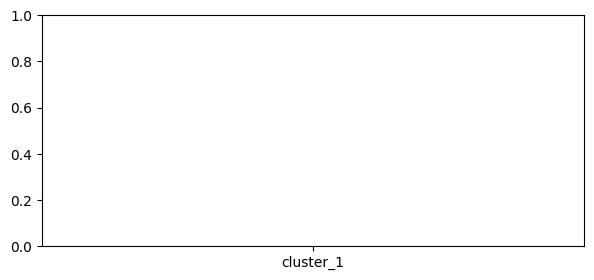

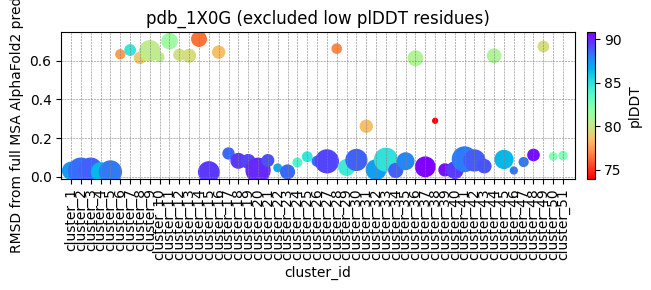

pdb_3HDE


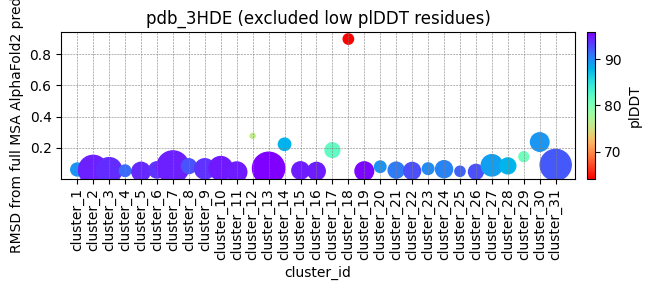

pdb_1JFK


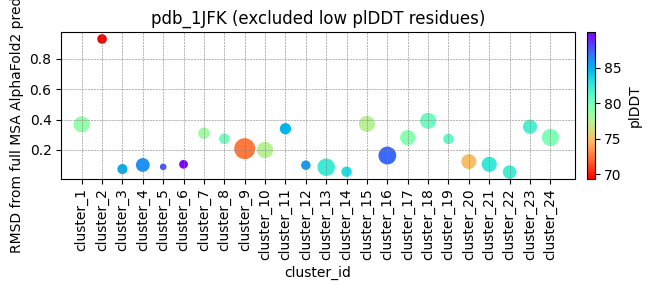

pdb_4RWN


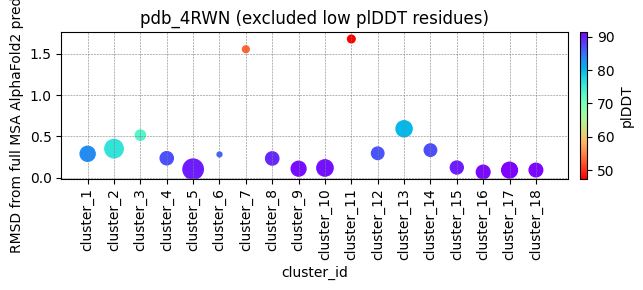

pdb_3UYI
pdb_2UY7


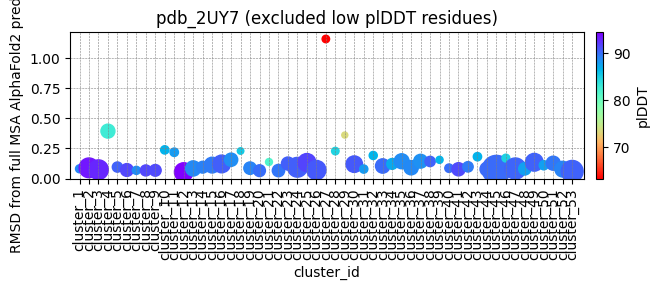

pdb_4XWS


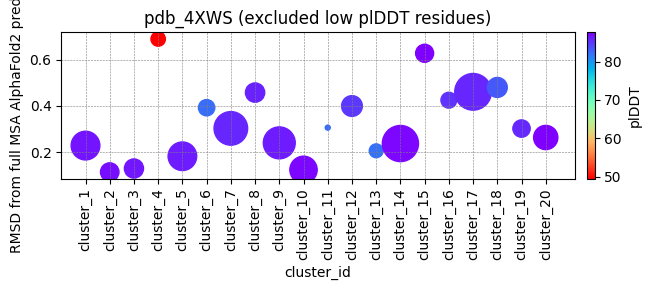

pdb_3IFA


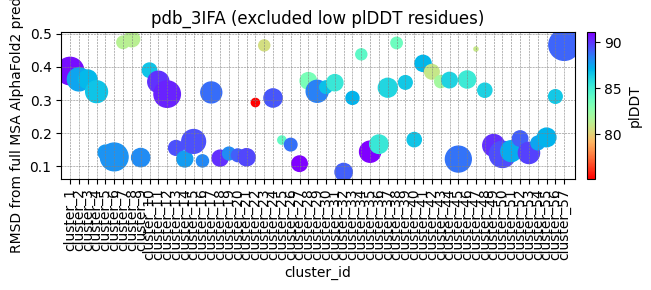

pdb_2K0Q


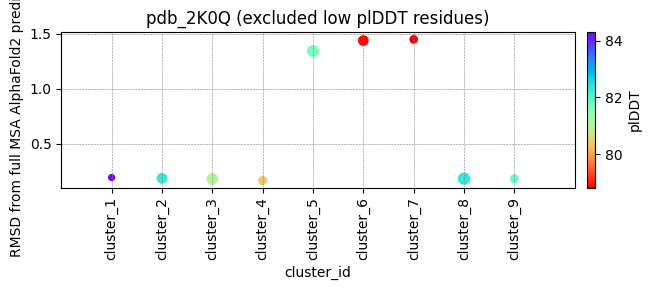

pdb_4QHF


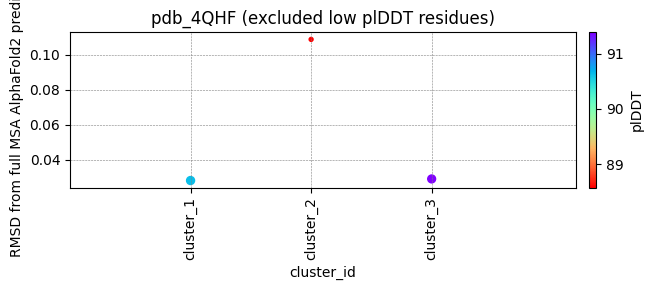

pdb_1K0N


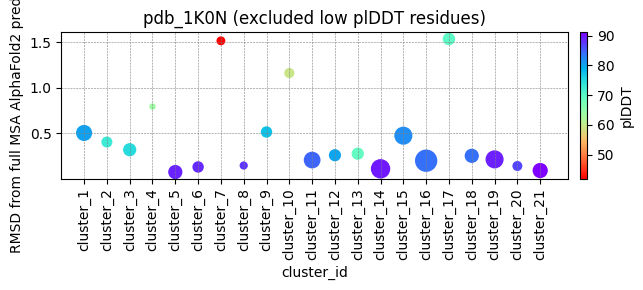

pdb_4AAL


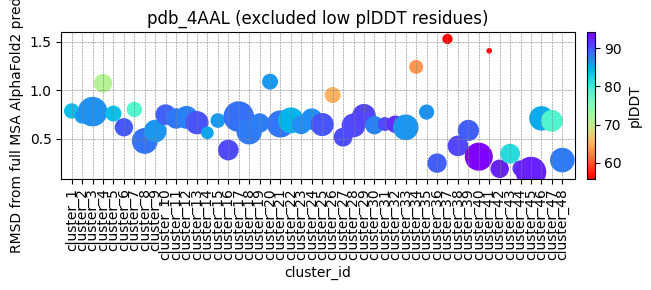

pdb_1RKP


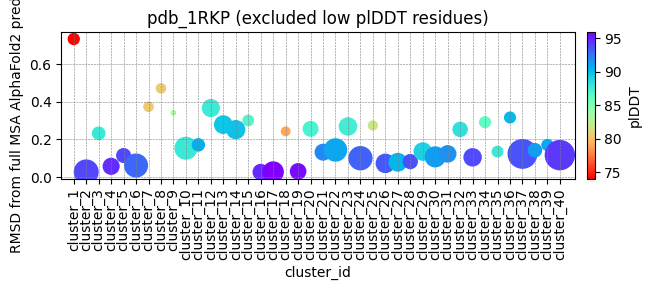

pdb_1ZK9


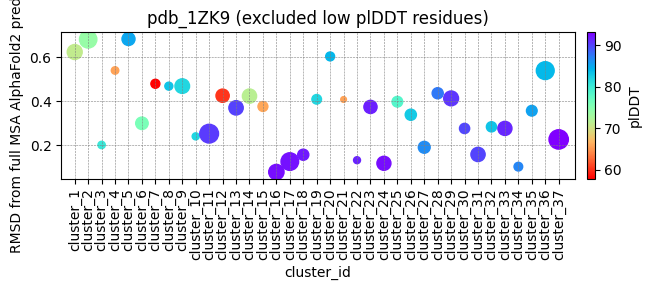

pdb_4JPH


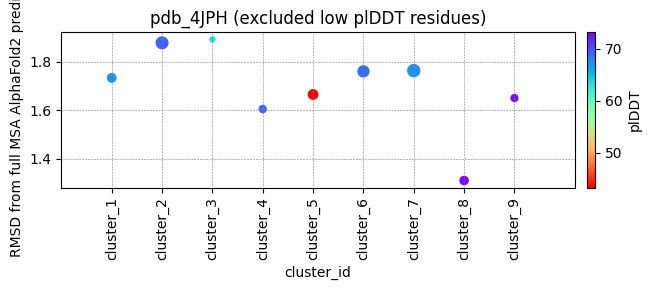

pdb_4DXR


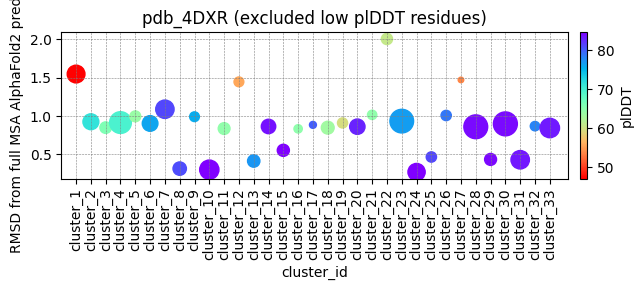

pdb_4Q79


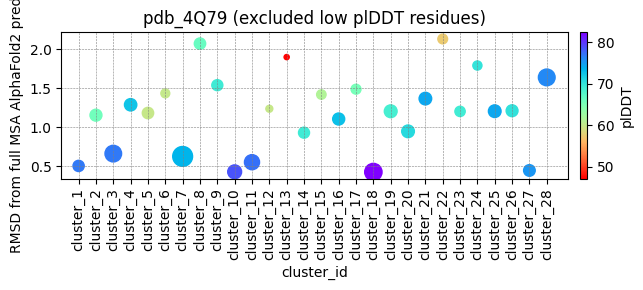

pdb_1EBO


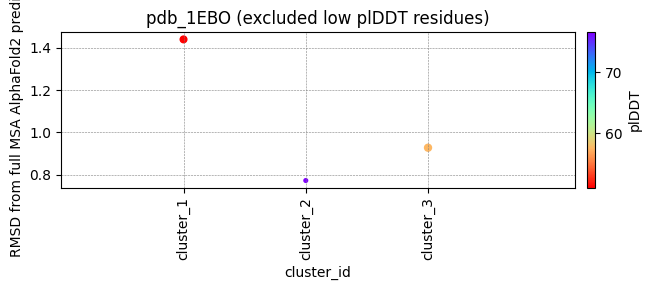

pdb_2P3V


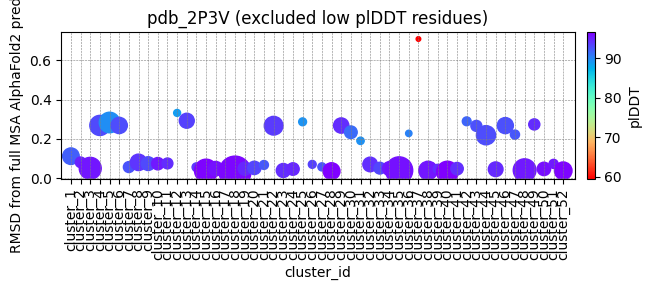

pdb_2JMR


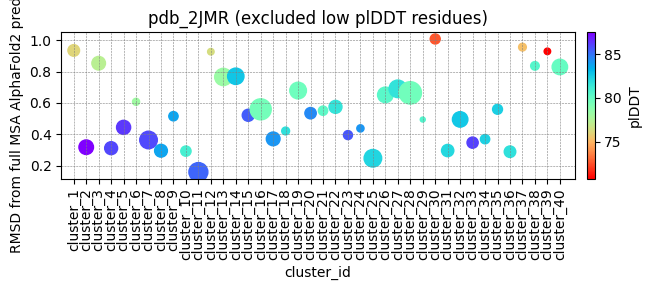

pdb_1CEE


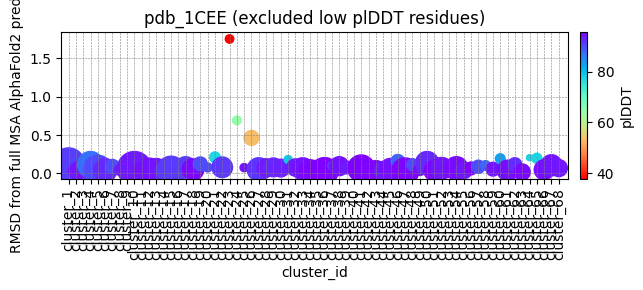

pdb_1MIQ


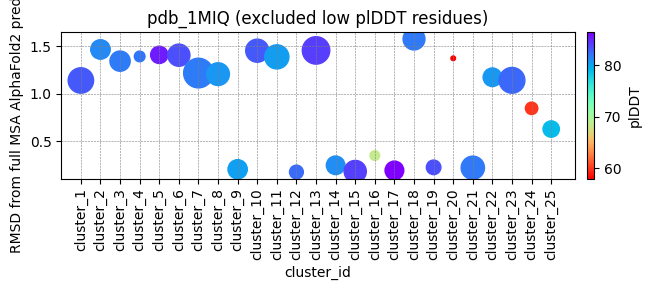

pdb_2AXZ
pdb_4GQC


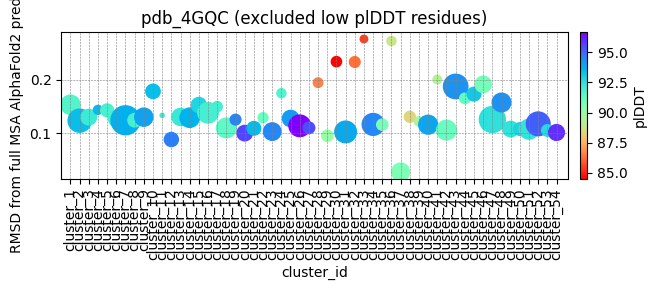

pdb_1XJT


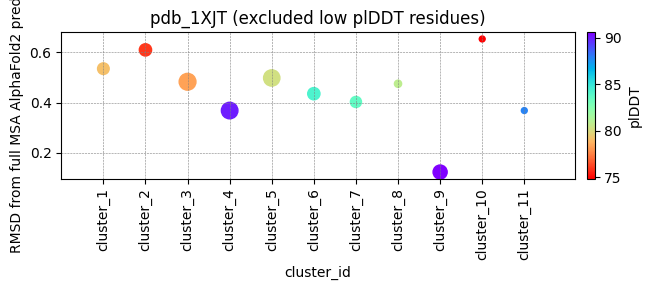

pdb_4N9W


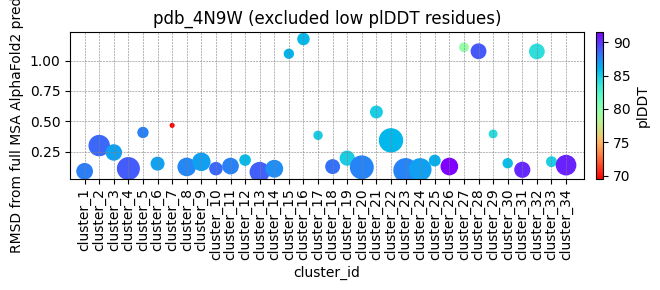

pdb_4ZRB


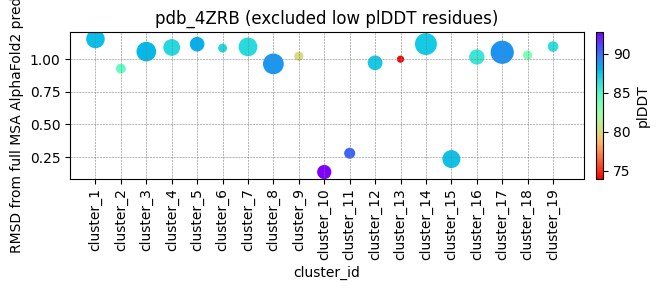

pdb_5OND


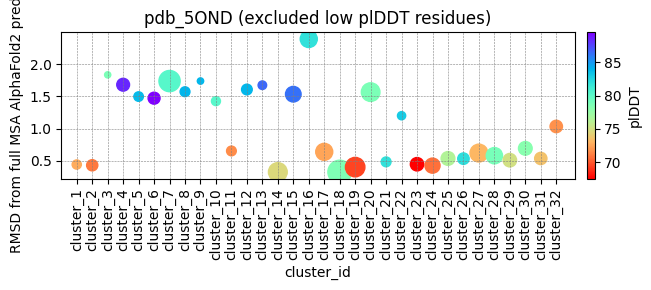

pdb_2MWF


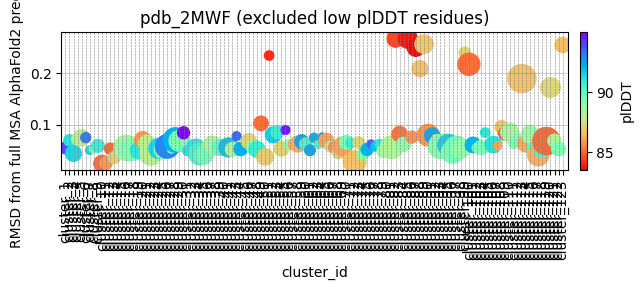

pdb_2KXO


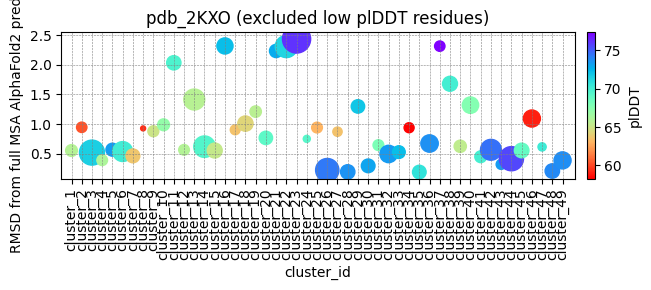

pdb_5F3K


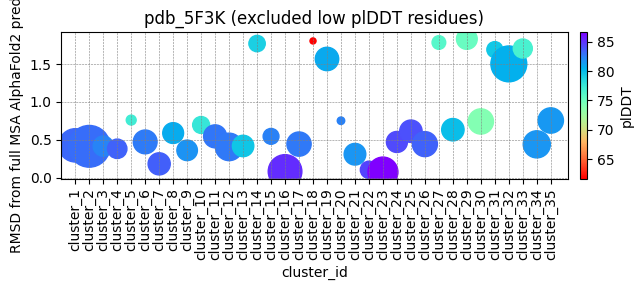

pdb_1JTI


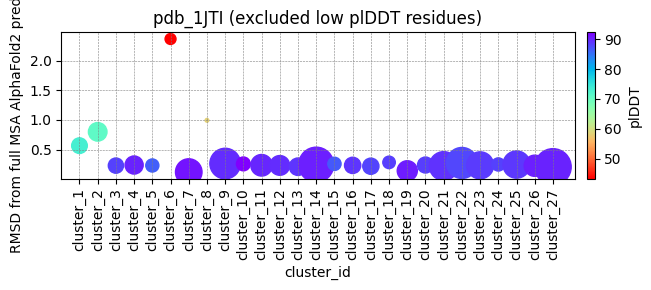

pdb_4PYI


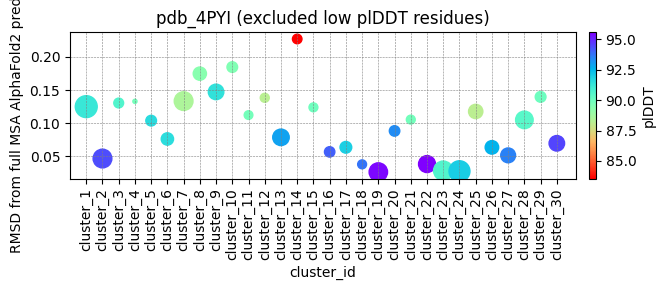

pdb_3J7V


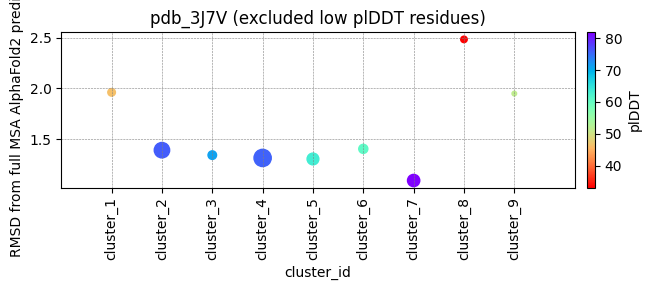

pdb_3LOW


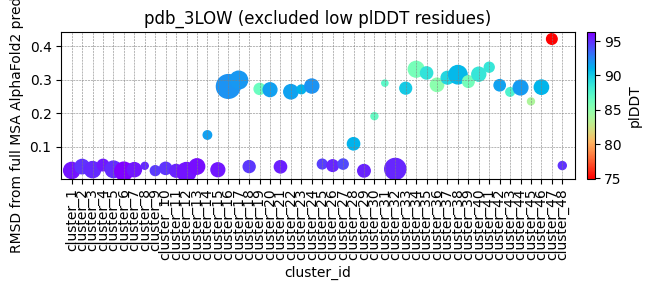

pdb_3EJH


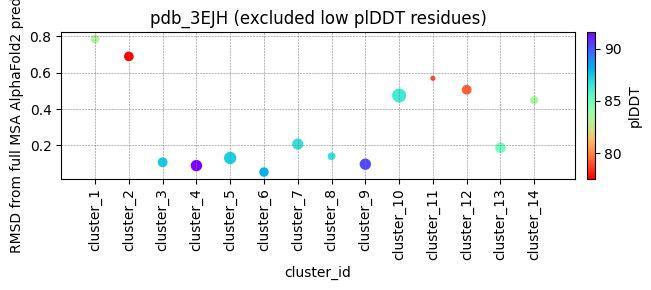

pdb_1UXM


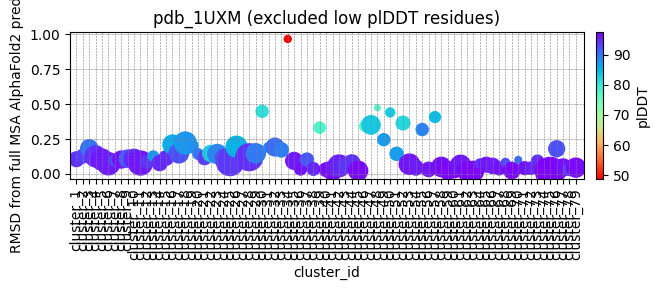

pdb_5C1V


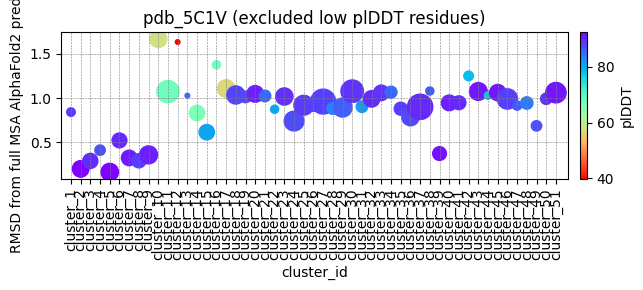

pdb_2WCD


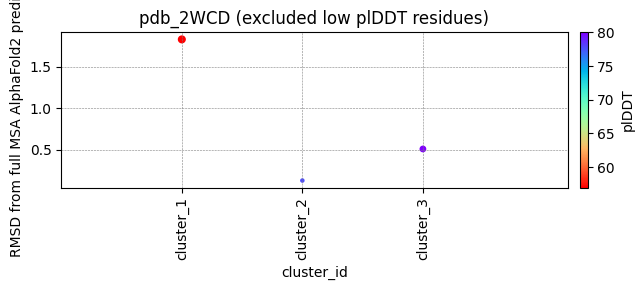

pdb_1U2C


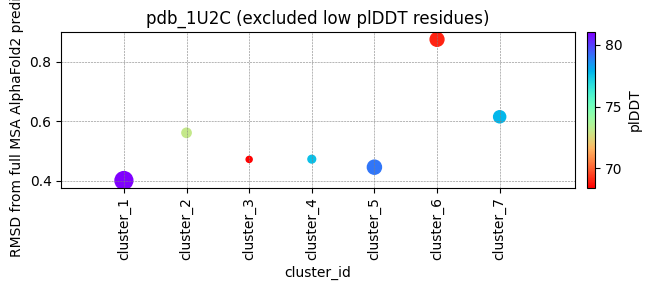

pdb_2VFX


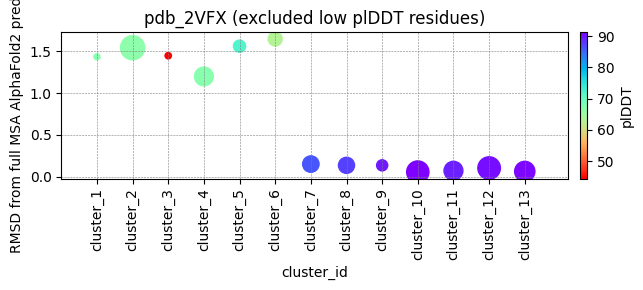

pdb_1REP


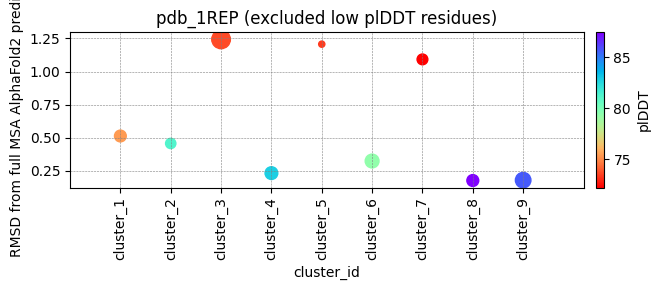

pdb_1IYT


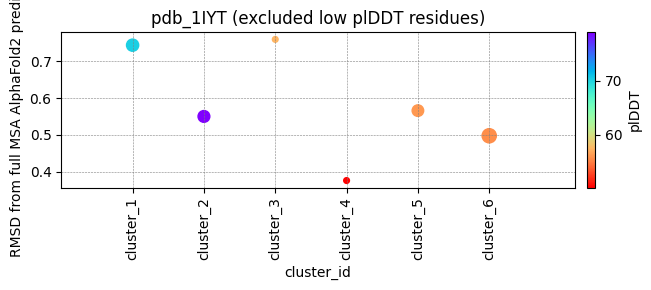

pdb_1NQD


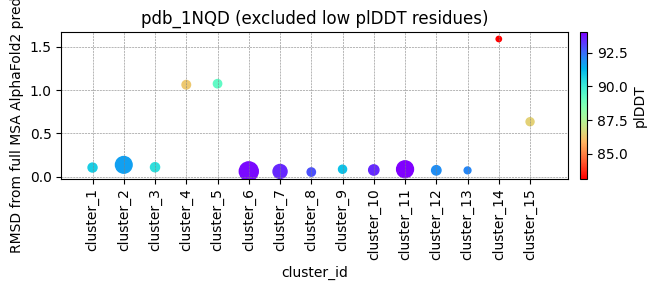

pdb_5JYT


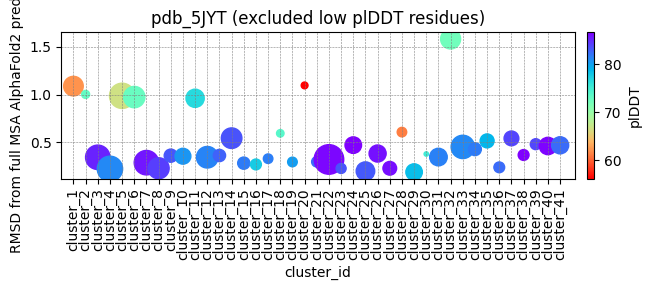

pdb_1KCT


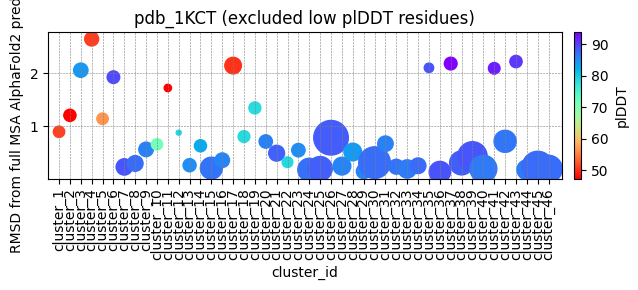

In [21]:
dirs = os.listdir('./')
pdb_dirs = [d for d in dirs if 'pdb_' in d]

for pdir in pdb_dirs:
    print(pdir)
    try:
        main(pdir)
    except Exception as e:
        continue

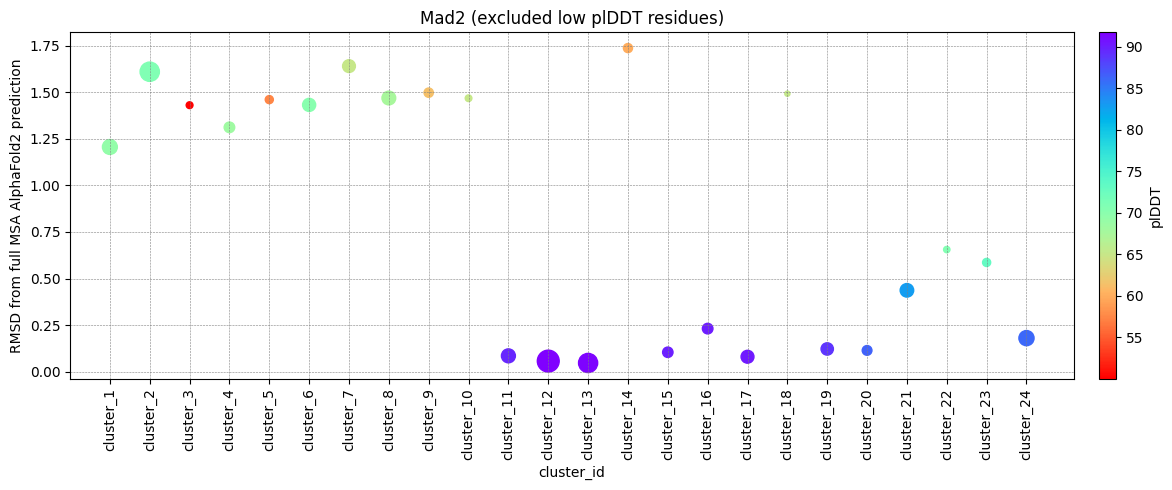

In [14]:
name = 'Mad2' 
main(name)

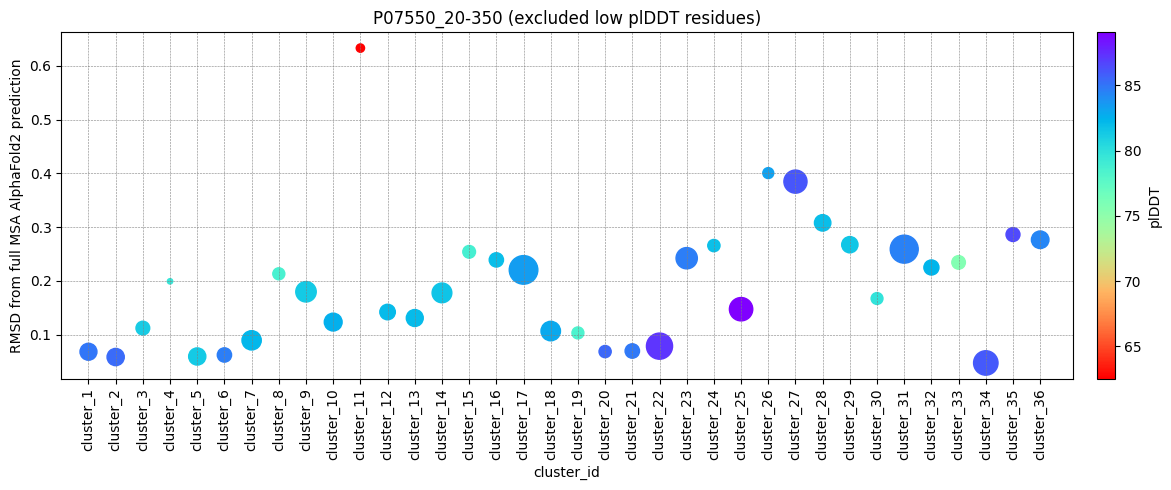

In [29]:
name = 'P07550_20-350' 
main(name)

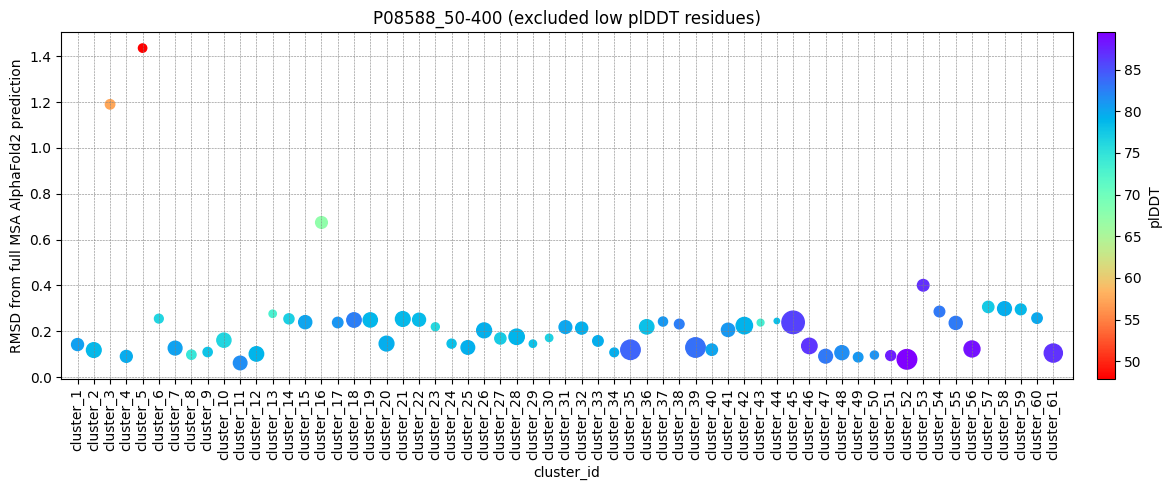

In [30]:
name = 'P08588_50-400' 
main(name)

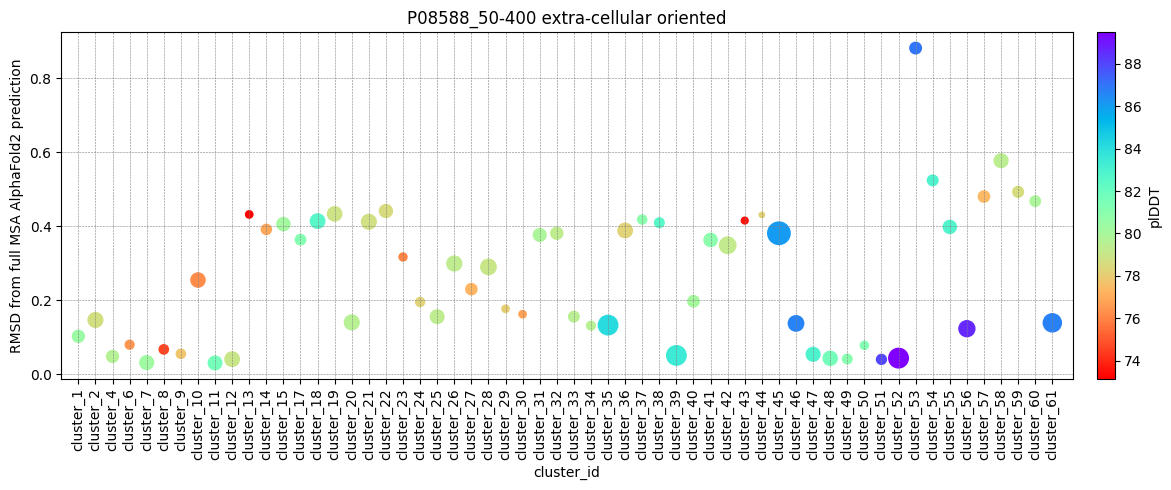

In [139]:
name = 'P08588_50-400' 
main(name)

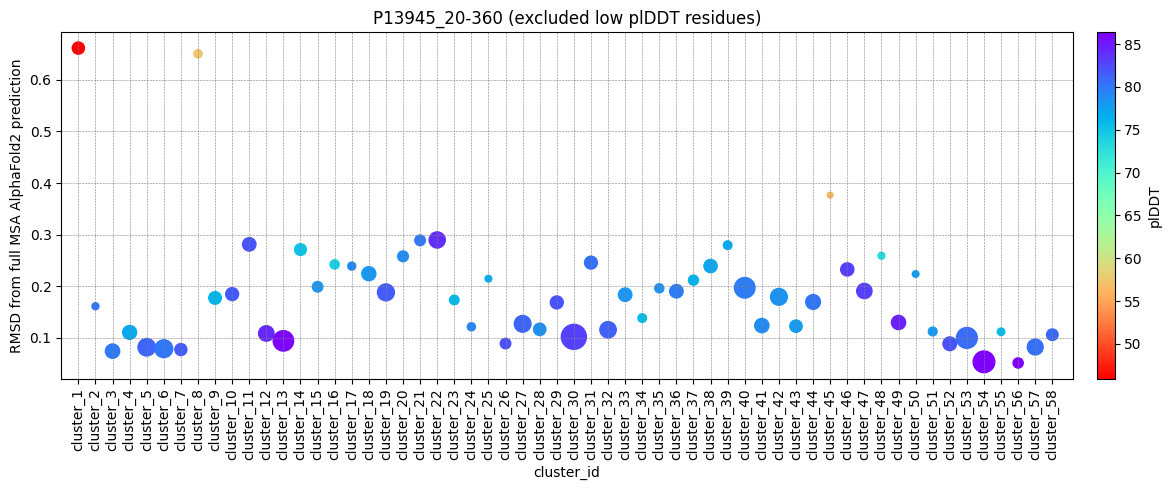

In [31]:
name = 'P13945_20-360' 
main(name)

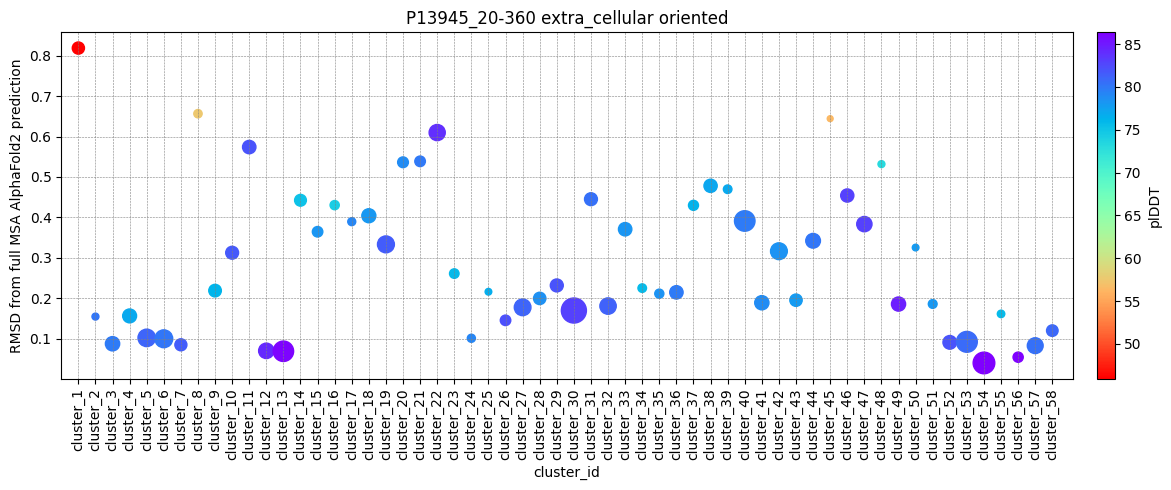

In [27]:
name = 'P13945_20-360' 
main(name)

In [11]:
alignment = AlignIO.read(path_full+'/'+name+'.fasta', "fasta")
sequences = [str(record.seq) for record in alignment]
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

frequency_matrix = pd.DataFrame(0, index=range(len(sequences[0])), columns=amino_acids)

for sequence in sequences:
    for i, residue in enumerate(sequence):
        if residue in amino_acids:
            frequency_matrix.loc[i, residue] += 1

frequency_matrix = frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0)

entropy = -np.nansum(frequency_matrix * np.log2(frequency_matrix + 1e-9), axis=1)
max_entropy = np.log2(len(amino_acids))  
information_content = max_entropy - entropy

info_matrix = frequency_matrix.mul(information_content, axis=0)
logo = logomaker.Logo(info_matrix)

logo.style_xticks(anchor=0, spacing=5)
logo.ax.set_xlabel("Position")
logo.ax.set_ylabel("Information Content (bits)")

plt.show()

NameError: name 'AlignIO' is not defined